In [1]:
import json
import os
results=[]
fileNr=1
while True:
    try:
        with open('data/results'+str(fileNr)+'.json', 'r') as file:
            results += json.load(file)
        fileNr+=1
    except FileNotFoundError:
        break
    
for result in results:
    result['chars']=result['prefixSize']+result['suffixSize']
    result['match']=1 if result['match'] else 0

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)


                                                          mean count
                                                         match match
prefixSize suffixSize completionSize category                       
200        20         10             beginningOfWord  0.118223  1531
                                     random           0.240077  1562
                      40             beginningOfWord  0.116917  1531
                                     random           0.175416  1562
                      100            beginningOfWord  0.107773  1531
                                     random           0.184379  1562
                      200            beginningOfWord  0.119218  1535
                                     random           0.169654  1562
                      400            beginningOfWord  0.099739  1534
                                     random           0.161332  1562


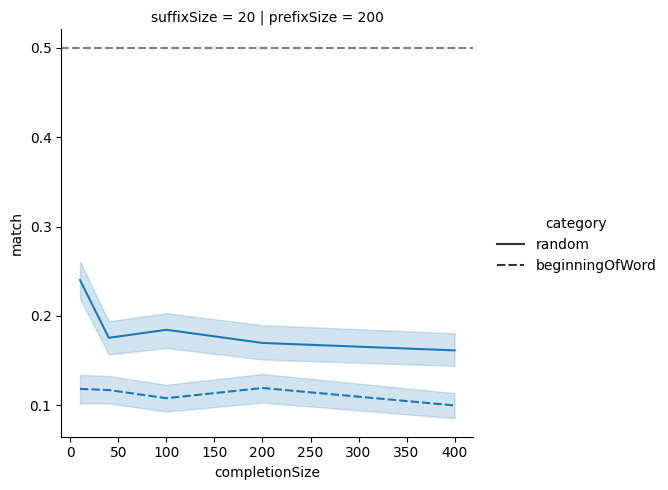

In [3]:
# pivoted=pd.pivot_table(df.query("category=='beginningOfWord' & completionSize==200"),index=['prefixSize','suffixSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df.query(" completionSize==10"),index=['prefixSize','suffixSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df.query("category=='beginningOfWord'"),index=['prefixSize','suffixSize','completionSize'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df.query("category=='beginningOfWord' & prefixSize==200"),index=['prefixSize','suffixSize','completionSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
pivoted=pd.pivot_table(df,index=['prefixSize','suffixSize','completionSize','category'], values=['match'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df,index=['completionSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df,index=['prefixSize','suffixSize','category'], values=['match','timeMs'])

print(pivoted)

g=sns.relplot(data=df, x='completionSize', y='match',col='prefixSize', row='suffixSize',style='category', kind="line" )
# g=sns.relplot(data=pivoted['mean'], x='completionSize', y='match',col='prefixSize', row='suffixSize',style='category', kind="line")
g.refline(y=0.5)
# foo=g.axes[0][0]
# foo.axvline(x=400, ls=':')
# foo.set_xlim(200,400)
# foo.set_ylim(0.4,0.6)
plt.show()